## Product Market Fit for Air Purifiers Leveraging AQI Analytics for Development

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Importing data files

In [2]:
fp = r"D:\9. Self Projects\Resume Challange\Resume Project - 16\Data Sets\Population data.csv"
population = pd.read_csv(fp)

In [3]:
file = r"D:\9. Self Projects\Resume Challange\Resume Project - 16\Data Sets\AQI(2022 - 2025).csv"
aqi = pd.read_csv(file)
aqi.head(3)

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


#### Data Exploration

In [4]:
aqi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           235785 non-null  object 
 1   state                          235785 non-null  object 
 2   area                           235785 non-null  object 
 3   number_of_monitoring_stations  235785 non-null  int64  
 4   prominent_pollutants           235785 non-null  object 
 5   aqi_value                      235785 non-null  int64  
 6   air_quality_status             235785 non-null  object 
 7   unit                           235785 non-null  object 
 8   note                           0 non-null       float64
dtypes: float64(1), int64(2), object(6)
memory usage: 16.2+ MB


In [5]:
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8892 entries, 0 to 8891
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    8892 non-null   int64  
 1   month   8892 non-null   object 
 2   state   8892 non-null   object 
 3   gender  8892 non-null   object 
 4   value   8892 non-null   int64  
 5   unit    8892 non-null   object 
 6   note    0 non-null      float64
dtypes: float64(1), int64(2), object(4)
memory usage: 486.4+ KB


In [7]:
population.describe()

,year,value,note
count,8892.000000,8892.000000,0.0
mean,2023.500000,17258.098628,NaN
std,7.500422,56221.494325,NaN
min,2011.000000,21.000000,NaN
25%,2017.000000,521.000000,NaN
50%,2023.500000,4198.500000,NaN
75%,2030.000000,14227.500000,NaN
max,2036.000000,599048.000000,NaN


#### Insights Generation

##### Secondary Question 3

In [8]:
# Step 1: Filter AQI data for the year 2024
aqi['date'] = pd.to_datetime(aqi['date'], dayfirst=True, errors='coerce')
aqi_2024 = aqi[aqi['date'].dt.year == 2024]

# Step 2: Convert 'aqi_value' to numeric
aqi_2024['aqi_value'] = pd.to_numeric(aqi_2024['aqi_value'], errors='coerce')

# Step 3: Calculate average AQI per area (city/town)
avg_aqi_by_area = (
    aqi_2024.groupby(['state', 'area'])['aqi_value']
    .mean()
    .reset_index()
    .rename(columns={'aqi_value': 'avg_aqi_2024'})
)

# Display the result
avg_aqi_by_area.head()

C:\Users\Hp\AppData\Local\Temp\ipykernel_9360\1499649092.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aqi_2024['aqi_value'] = pd.to_numeric(aqi_2024['aqi_value'], errors='coerce')


,state,area,avg_aqi_2024
0,Andhra Pradesh,Amaravati,62.919308
1,Andhra Pradesh,Anantapur,68.941818
2,Andhra Pradesh,Chittoor,75.683206
3,Andhra Pradesh,Kadapa,62.495902
4,Andhra Pradesh,Rajamahendravaram,73.183381


In [9]:
# Step 4: Filter for total population and convert 'value' to actual population numbers
population_total = population[(population['gender'] == 'Total')].copy()
population_total['population'] = population_total['value'] * 1000  # Convert from 'Thousands'

# Select relevant columns and drop duplicates
state_population = population_total[['state', 'population']].drop_duplicates()

# Display state-level population data
state_population.head()

,state,population
0,West Bengal,43964000
3,Uttarakhand,5506000
6,Uttar Pradesh,67511000
9,Tripura,2499000
12,Telangana,22817000


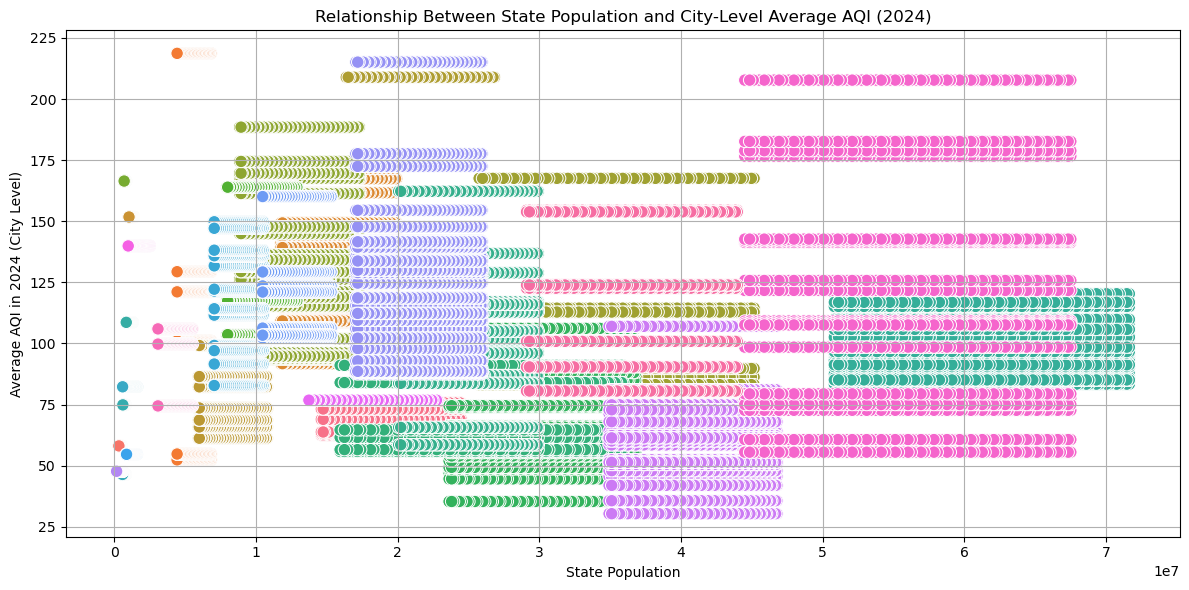

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Merge AQI with population
merged_df = avg_aqi_by_area.merge(state_population, on='state', how='left')
merged_df.dropna(subset=['population'], inplace=True)

# Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=merged_df, x='population', y='avg_aqi_2024', hue='state', legend=False, s=80)
plt.title('Relationship Between State Population and City-Level Average AQI (2024)')
plt.xlabel('State Population')
plt.ylabel('Average AQI in 2024 (City Level)')
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='population', ylabel='avg_aqi_2024'>

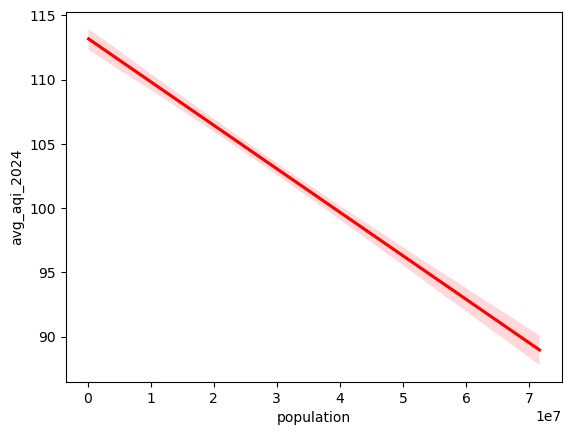

In [12]:
sns.regplot(data=merged_df, x='population', y='avg_aqi_2024', scatter=False, color='red')


In [13]:
from scipy.stats import pearsonr
corr, _ = pearsonr(merged_df['population'], merged_df['avg_aqi_2024'])
print(f"Correlation: {corr:.2f}")


Correlation: -0.17


##### Secondary Question 5

In [11]:
import pandas as pd
file = r"D:\9. Self Projects\Resume Challange\Resume Project - 16\Data Sets\2022.xlsx"
a = pd.read_excel(file)
a.head()

,State,Year,SO2,NO2,PM10,PM2.5
0,Andhra Pradesh,2022,7.5,18.1,63.9,29.8
1,Arunachal Pradesh,2022,15.0,11.5,57.5,23
2,Assam,2022,7.0,12.8,75.5,34.9
3,Bihar,2022,8.5,35.8,168.3,82.8
4,Chandigarh,2022,7.0,27.0,113.0,57


In [12]:
import pandas as pd
fp = r"D:\9. Self Projects\Resume Challange\Resume Project - 16\Data Sets\2023.xlsx"
b = pd.read_excel(fp)
b.head()

,State,Year,SO2,NO2,PM10,PM2.5
0,Andaman & Nicobar,2023,Null,Null,22.00,Null
1,Andhra Pradesh,2023,8.25,19.58,69.42,33.78
2,Arunachal Pradesh,2023,Null,Null,45.00,24
3,Assam,2023,10.5,15.25,95.25,44.75
4,Bihar,2023,12.65,27.65,160.35,71.9


In [13]:
# Convert pollutant columns to numeric (coerce invalids to NaN)  converting to numeric
for col in ['SO2', 'NO2', 'PM10', 'PM2.5']:
    a[col] = pd.to_numeric(a[col], errors='coerce')
    b[col] = pd.to_numeric(b[col], errors='coerce')


In [14]:
merged = pd.merge(
    a,
    b,
    how='inner',
    on=['State'],
    suffixes=('_2022', '_2023')
)


In [15]:
merged['SO2_Diff'] = merged['SO2_2023'] - merged['SO2_2022']
merged['NO2_Diff'] = merged['NO2_2023'] - merged['NO2_2022']
merged['PM10_Diff'] = merged['PM10_2023'] - merged['PM10_2022']
merged['PM2.5_Diff'] = merged['PM2.5_2023'] - merged['PM2.5_2022']


In [14]:
# Export to CSV 
merged.to_csv("Air_Quality_Differences.csv", index=False)

In [12]:
fp1 = r"C:\Users\Hp\Self_python_project\Export folders\Air_Quality_Differences.csv"
df1 = pd.read_csv(fp1)
df1.head()

,State,Year_2022,SO2_2022,NO2_2022,PM10_2022,PM2.5_2022,Year_2023,SO2_2023,NO2_2023,PM10_2023,PM2.5_2023,SO2_Diff,NO2_Diff,PM10_Diff,PM2.5_Diff
0,Andhra Pradesh,2022,7.5,18.1,63.9,29.8,2023,8.25,19.58,69.42,33.78,0.75,1.48,5.52,3.98
1,Arunachal Pradesh,2022,15.0,11.5,57.5,23.0,2023,NaN,NaN,45.00,24.00,NaN,NaN,-12.50,1.00
2,Assam,2022,7.0,12.8,75.5,34.9,2023,10.50,15.25,95.25,44.75,3.50,2.45,19.75,9.85
3,Bihar,2022,8.5,35.8,168.3,82.8,2023,12.65,27.65,160.35,71.90,4.15,-8.15,-7.95,-10.90
4,Chandigarh,2022,7.0,27.0,113.0,57.0,2023,6.00,25.00,113.00,58.00,-1.00,-2.00,0.00,1.00


##### Primary Question 7

In [3]:
import pyodbc
import pandas as pd


# Set up connection
conn = pyodbc.connect(
    r"Driver={SQL Server};"
    r"Server=localhost\SQLEXPRESS;"
    r"Database=AQI_Analytics;"
    r"Trusted_Connection=yes;"
)

# Query from SQL 
query = """
-- Step 1: States with AQI data
with ValidAqiStates as (
    select distinct state
    from AQI
),

-- Step 2: Top 5 EV states
TopEvStates as (
    select top 5 
        state, 
        count(*) as Total_EV
    from [Vehicle data]
    where fuel like '%EV%' 
       or fuel like '%ELECTRIC%' 
       or  fuel like '%HYBRID%' 
       or fuel like '%FUEL CELL%'
    group by state
    order by Total_EV desc
),

-- Step 3: All other EV states that are not in Top 5 but have AQI data
OtherEvStates as (
    select 
        vd.state, 
        count(*) as Total_EV
   from [Vehicle data] vd
   join ValidAqiStates as vas on vd.state = vas.state
    where (fuel like '%EV%' 
        or  fuel like '%ELECTRIC%' 
        or  fuel like '%HYBRID%' 
        or  fuel like '%FUEL CELL%')
      and vd.state not in (select state from TopEvStates)
    group by vd.state
),

-- Step 4: AQI average per state
AqiAvg as (
    select 
        state, 
        avg(aqi_value) AS Avg_AQI_Value
    from AQI
    group by state
),

-- Step 5: Combine High EV and All Others
EvAdoption as (
    select state, Total_EV, 'High EV Adoption' as EV_Group from TopEvStates
    union all
   select state, Total_EV, 'Other States' as EV_Group from OtherEvStates
),

-- Step 6: Join with AQI (only valid states due to earlier filter)
FinalJoin as (
    select 
        ea.state, 
        ea.Total_EV, 
        ea.EV_Group, 
        aa.Avg_AQI_Value
    from EvAdoption ea
    join AqiAvg as aa on ea.state = aa.state
)

-- Step 7: Final Output – State-wise
select
    state, 
    Total_EV, 
   EV_Group, 
   Avg_AQI_Value
from FinalJoin
order by EV_Group, Total_EV desc;
"""

df = pd.read_sql(query, conn)

df.head()


C:\Users\Hp\AppData\Local\Temp\ipykernel_26956\1921629455.py:87: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


,state,Total_EV,EV_Group,Avg_AQI_Value
0,Karnataka,886,High EV Adoption,62
1,Maharashtra,783,High EV Adoption,103
2,Gujarat,741,High EV Adoption,110
3,Rajasthan,731,High EV Adoption,127
4,Tamil Nadu,715,High EV Adoption,67


In [11]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['Total_EV'], df['Avg_AQI_Value'])
print(f"Pearson Correlation: {corr.round(2)}, P-value: {p_value.round(3)}")


Pearson Correlation: 0.36, P-value: 0.045
